<a href="https://colab.research.google.com/github/Nelson-Muteti/Naive_Bayes-and-KNN_Project/blob/main/Nelson_Muteti_Naive_Bayes_IP_Week_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Defining The Question

We are supposed to build a Naive-Bayes Machine learning model to be able to classify emails as either Spam or not Spam from given frequencies of occurences of certain words in the emails.

In [306]:
#import libraries to use in the model
import pandas as pd
import numpy as np

## Defining Metrics for Success

A succesful project will  conduct Data preparation, data cleaning,evaluation, data Modelling and finally optimization of the model to classify emails as spam or not.

## Understanding The context

The context here deals with Spam emails. Spam is just a term for unsolicited bulk email messages. Spam encompasses everything from ads for products and services, drugs,money scams, stock market pump-and-dump schemes, malware, phishing and everything in between. It is important to know how to classify emails as spam or not spam inorder to help consumers.

## Experimental Design

Since the data seems to be mostly prepared, we will do basic preprocessing and then some EDA and finally build our Naive_Bayes model.

## Read the data

In [307]:
#load the data
df = pd.read_csv('/content/spambase.data')

In [308]:
#view the data
df.head(2)

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


**Attribute Information.**

**The last column of 'spambase.data' denotes whether the e-mail was considered spam (1) or not (0).**

In [309]:
#check data shape
df.shape

(4600, 58)

In [310]:
#get number of columns in data
len(df.columns)

58

In [311]:
#read the column names of data
with open('/content/spambase.names') as f:
    print(f.read())

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

## External Data Validation
To validate the integrity of this data, we load the following document. This document contains the explanation of each column and datatypes as well as data collection information.

In [312]:
#understand the context and documentation of data
url = '/content/spambase.DOCUMENTATION'
with open(url) as f:
    print(f.read())

1. Title:  SPAM E-mail Database

2. Sources:
   (a) Creators: Mark Hopkins, Erik Reeber, George Forman, Jaap Suermondt
        Hewlett-Packard Labs, 1501 Page Mill Rd., Palo Alto, CA 94304
   (b) Donor: George Forman (gforman at nospam hpl.hp.com)  650-857-7835
   (c) Generated: June-July 1999

3. Past Usage:
   (a) Hewlett-Packard Internal-only Technical Report. External forthcoming.
   (b) Determine whether a given email is spam or not.
   (c) ~7% misclassification error.
       False positives (marking good mail as spam) are very undesirable.
       If we insist on zero false positives in the training/testing set,
       20-25% of the spam passed through the filter.

4. Relevant Information:
        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work a

In [313]:
df.columns

Index(['0', '0.64', '0.64.1', '0.1', '0.32', '0.2', '0.3', '0.4', '0.5', '0.6',
       '0.7', '0.64.2', '0.8', '0.9', '0.10', '0.32.1', '0.11', '1.29', '1.93',
       '0.12', '0.96', '0.13', '0.14', '0.15', '0.16', '0.17', '0.18', '0.19',
       '0.20', '0.21', '0.22', '0.23', '0.24', '0.25', '0.26', '0.27', '0.28',
       '0.29', '0.30', '0.31', '0.32.2', '0.33', '0.34', '0.35', '0.36',
       '0.37', '0.38', '0.39', '0.40', '0.41', '0.42', '0.778', '0.43', '0.44',
       '3.756', '61', '278', '1'],
      dtype='object')

## Data Cleaning

The data is already well formatted but we can replace and rename the column names for better understanding of context.

In [314]:
#rename all the columns for better EDA
df.rename(columns = {'0':'make','0.64':'address','0.64.1':'all','0.1':'3d','0.32':'our','0.2':'over',
                     '0.3':'remove','0.4':'internet','0.5':'order','0.6':'mail',
                     '0.7':'receive','0.64.2':'will','0.8':'people','0.9':'report',
                     '0.10':'addresses','0.32.1':'free','0.11':'business','1.29':'email','1.93':'You',
                     '0.12':'credit','0.96':'your','0.13':'font','0.14':'000','0.15':'money',
                     '0.16':'hp','0.17':'hpl','0.18':'George','0.19':'650','0.20':'lab',
                     '0.21':'labs','0.22':'telnet','0.23':'857','0.24':'data','0.25':'415',
                     '0.26':'85','0.27':'Technology','0.28':'1999','0.29':'Parts','0.30':'PM','0.31':'Direct',
                     '0.32':'CS','0.33':'Meeting','0.34':'Original','0.35':'Project','0.36':'RE',
                     '0.37':'EDU','0.38':'Table','0.39':'Conference','0.40':';','0.41':'(',
                     '0.42':'callibrace','0.778':'!','0.43':'$','0.44':'#','3.756':'Capital_Run_length_avg',
                     '61':'Capital_Run_length_longest','278':'Capital_Run_length_total','1':'Spam',},inplace = True)

In [315]:
df.head(2)

,make,address,all,3d,CS,over,remove,internet,order,mail,receive,will,people,report,addresses,free,business,email,You,credit,your,font,000,money,hp,hpl,George,650,lab,labs,telnet,857,data,415,85,Technology,1999,Parts,PM,Direct,0.32.2,Meeting,Original,Project,RE,EDU,Table,Conference,;,(,callibrace,!,$,#,Capital_Run_length_avg,Capital_Run_length_longest,Capital_Run_length_total,Spam
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1


In [316]:
#now for data cleaning
df.isnull().sum()

#there are no missing values in data

make                          0
address                       0
all                           0
3d                            0
CS                            0
over                          0
remove                        0
internet                      0
order                         0
mail                          0
receive                       0
will                          0
people                        0
report                        0
addresses                     0
free                          0
business                      0
email                         0
You                           0
credit                        0
your                          0
font                          0
000                           0
money                         0
hp                            0
hpl                           0
George                        0
650                           0
lab                           0
labs                          0
telnet                        0
857     

In [317]:
df.dtypes

make                          float64
address                       float64
all                           float64
3d                            float64
CS                            float64
over                          float64
remove                        float64
internet                      float64
order                         float64
mail                          float64
receive                       float64
will                          float64
people                        float64
report                        float64
addresses                     float64
free                          float64
business                      float64
email                         float64
You                           float64
credit                        float64
your                          float64
font                          float64
000                           float64
money                         float64
hp                            float64
hpl                           float64
George      

In [318]:
df.shape

(4600, 58)

## Exploratory Data Analysis

Lets try do some Univariate and Bivariate EDA of some variables in this data.

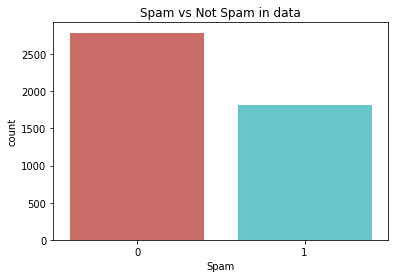

In [319]:
#Univariate EDA

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x = 'Spam',data = df,palette='hls')
plt.title('Spam vs Not Spam in data')
plt.show()

#majority of emails are classified as not spam

In [320]:
df['free'].describe()

#checking the descriptive statistics of the word 'free' in emails

count    4600.000000
mean        0.248833
std         0.825881
min         0.000000
25%         0.000000
50%         0.000000
75%         0.100000
max        20.000000
Name: free, dtype: float64

In [321]:
df['You'].describe()

#the word 'You' has appears in almost all emails.

#This means that it is not a strong indicator of whether an email is Spam or not spam

count    4600.000000
mean        1.662041
std         1.775669
min         0.000000
25%         0.000000
50%         1.310000
75%         2.640000
max        18.750000
Name: You, dtype: float64

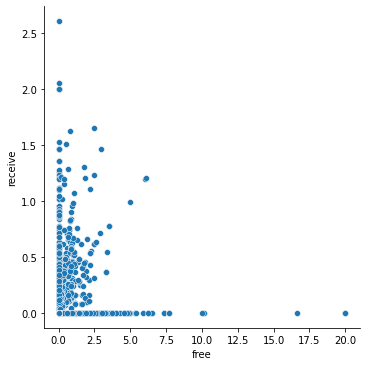

In [322]:
#bivariate EDA

sns.relplot(x = 'free',y = 'receive',data = df)

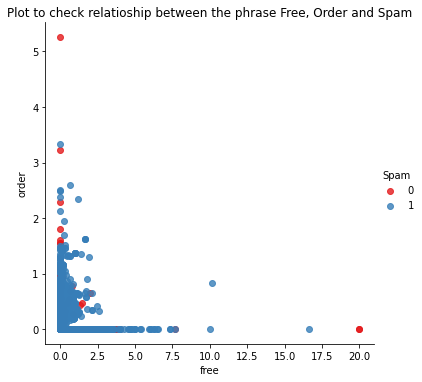

In [323]:
sns.lmplot(x = 'free',y = 'order',hue = 'Spam',palette='Set1',data = df,fit_reg=False)
plt.title('Plot to check relatioship between the phrase Free, Order and Spam')
plt.show()

**The EDA of this data does not seem to inform us much concerning the problem in question. This is because the data is simply a collection of frequences of occurences of certain words in emails.**

## Implementing the solution

First we will ensure data is balanced to avoid underfitting. This will be done by **downsampling** the data.

In [324]:
#downsample data for modelling

from sklearn.utils import resample

spam_df = df[df['Spam'] == 1]
spam_df.shape

(1812, 58)

In [325]:
spamdf = resample(spam_df,replace = False,n_samples = 500,random_state =42)
spamdf.shape

(500, 58)

In [326]:
#get rows of data containing Not spam emails
nospam_df = df[df['Spam'] == 0]
nospam_df.shape

(2788, 58)

In [327]:
# downsample to remove imbalance

nospamdf = resample(nospam_df,replace = False,n_samples = 500,random_state =42)
nospamdf.shape

(500, 58)

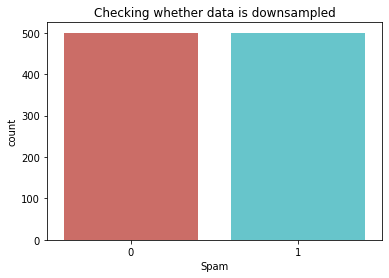

In [328]:
#merge the samples

newdf = pd.concat([nospamdf,spamdf])
sns.countplot(x = 'Spam',data = newdf,palette='hls')
plt.title('Checking whether data is downsampled')
plt.show()

Now that the data is well balanced for modelling, we will proceed with further preprocessing.

In [329]:
#now to build the model

#confirm that categorical data types are well encoded

df.columns

Index(['make', 'address', 'all', '3d', 'CS', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'You', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'George', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'Technology', '1999', 'Parts', 'PM', 'Direct',
       '0.32.2', 'Meeting', 'Original', 'Project', 'RE', 'EDU', 'Table',
       'Conference', ';', '(', 'callibrace', '!', '$', '#',
       'Capital_Run_length_avg', 'Capital_Run_length_longest',
       'Capital_Run_length_total', 'Spam'],
      dtype='object')

### Data Pre-Processing

First, we scale the data using **Standard Scaler().**

In [330]:
#scale the data 

# use standard scaler for this
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_features = ['make', 'address', 'all', '3d', 'CS', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'You', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'George', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'Technology', '1999', 'Parts', 'PM', 'Direct',
       '0.32.2', 'Meeting', 'Original', 'Project', 'RE', 'EDU', 'Table',
       'Conference', ';', '(', 'callibrace', '!', '$', '#',
       'Capital_Run_length_avg', 'Capital_Run_length_longest',
       'Capital_Run_length_total']

from sklearn.model_selection import train_test_split

X = newdf[df_features].values

y = newdf['Spam'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [331]:
#on scaling

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In order to fit a naive Bayes model, we first optimise the model by **Normalizing the data.**

In [332]:
#now fit a Naive Bayes Model

# First, we use a Gaussian Naive Bayes Model

# for this we normalize the data

from sklearn.preprocessing import normalize
X_train = normalize(X_train, norm='max')
X_test = normalize(X_test, norm='max')

Next, we use **Linear Discriminant Analysis to reduce dimensionality of data.**

In [333]:
#now use LDA for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train = lda.fit_transform(X_train,y_train)

X_test = lda.transform(X_test)

**Model 1 : Test Size [ 80 - 20 ]**

In [334]:
#now that data is normalized, we fit model

from sklearn.naive_bayes import GaussianNB

mymodel = GaussianNB()

mymodel.fit(X_train,y_train)

ypred = mymodel.predict(X_test)

In [335]:
#get accuracy metrics for data

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print('Accuracy : ',accuracy_score(y_test,ypred) * 100)

print('')

print('F1 Score : ',f1_score(y_test,ypred) * 100)

print('')

confusion_matrix(y_test,ypred) 

Accuracy :  90.5

F1 Score :  90.45226130653265



array([[91,  7],
       [12, 90]])

The first GaussianNB model has an accuracy of 90.5 % while having a good F1_score of 90.4 % to positively predict emails as spam. This model used a test size of 80 - 20 on train  / test data. Lets optimize this model using other test sizes

**Model 2 : Test Size 70 - 30**

In [336]:
#scale the data 

# use standard scaler for this
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_features = ['make', 'address', 'all', '3d', 'CS', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'You', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'George', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'Technology', '1999', 'Parts', 'PM', 'Direct',
       '0.32.2', 'Meeting', 'Original', 'Project', 'RE', 'EDU', 'Table',
       'Conference', ';', '(', 'callibrace', '!', '$', '#',
       'Capital_Run_length_avg', 'Capital_Run_length_longest',
       'Capital_Run_length_total']

from sklearn.model_selection import train_test_split

X = newdf[df_features].values

y = newdf['Spam'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

#on scaling

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#now fit a Naive Bayes Model

# First, we use a Gaussian Naive Bayes Model

# for this we normalize the data

from sklearn.preprocessing import normalize
X_train = normalize(X_train, norm='max')
X_test = normalize(X_test, norm='max')

#now use LDA for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train = lda.fit_transform(X_train,y_train)

X_test = lda.transform(X_test)

#now that data is normalized, we fit model

from sklearn.naive_bayes import GaussianNB

model2 = GaussianNB()

model2.fit(X_train,y_train)

ypred2 = model2.predict(X_test)

#get accuracy metrics for data

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print('Accuracy : ',accuracy_score(y_test,ypred2) * 100)

print('')

print('F1 Score : ',f1_score(y_test,ypred2) * 100)

print('')

confusion_matrix(y_test,ypred2) 

Accuracy :  90.33333333333333

F1 Score :  90.49180327868852



array([[133,  11],
       [ 18, 138]])

**Model 2** accuracy decreases by about 0.2% while its F1_Score for **precision and recall** remained constant at 90.4 %

**Model 3 : Test size [60 - 40 ]**

In [337]:
#scale the data 

# use standard scaler for this
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

df_features = ['make', 'address', 'all', '3d', 'CS', 'over', 'remove', 'internet',
       'order', 'mail', 'receive', 'will', 'people', 'report', 'addresses',
       'free', 'business', 'email', 'You', 'credit', 'your', 'font', '000',
       'money', 'hp', 'hpl', 'George', '650', 'lab', 'labs', 'telnet', '857',
       'data', '415', '85', 'Technology', '1999', 'Parts', 'PM', 'Direct',
       '0.32.2', 'Meeting', 'Original', 'Project', 'RE', 'EDU', 'Table',
       'Conference', ';', '(', 'callibrace', '!', '$', '#',
       'Capital_Run_length_avg', 'Capital_Run_length_longest',
       'Capital_Run_length_total']

from sklearn.model_selection import train_test_split

X = newdf[df_features].values

y = newdf['Spam'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.4,random_state = 0)

#on scaling

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

#now fit a Naive Bayes Model

# First, we use a Gaussian Naive Bayes Model

# for this we normalize the data

from sklearn.preprocessing import normalize
X_train = normalize(X_train, norm='max')
X_test = normalize(X_test, norm='max')

#now use LDA for dimensionality reduction

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)

X_train = lda.fit_transform(X_train,y_train)

X_test = lda.transform(X_test)

#now that data is normalized, we fit model

from sklearn.naive_bayes import GaussianNB

model3 = GaussianNB()

model3.fit(X_train,y_train)

mypred = model3.predict(X_test)

#get accuracy metrics for data

from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

print('Accuracy : ',accuracy_score(y_test,mypred) * 100)

print('')

print('F1 Score : ',f1_score(y_test,mypred) * 100)

print('')

confusion_matrix(y_test,mypred) 

Accuracy :  91.0

F1 Score :  90.42553191489361



array([[194,  12],
       [ 24, 170]])

Increasing the test size from 20 % to 40 % increases the model accuracy from 90% to 91  and the F1_Score for **Precison and Recall** remains constant.  This is the best model to use in this Spam Classification problem since the number of True Positives from the **Confusion Matrix is high, denoting a better recall and precision** as compared to the other models.

## Recommendations

Since Model 3 performed by far the best classification job, we can recommend this model for use in this Spam Classification problem since the number of True Positives from the Confusion Matrix is high, denoting a better recall and precision as compared to the other models.